# LP2 CUSTOMER CHURN PROJECT

<B>PROJECT DESCRIPTION<b>
#### Customer Churn is the percentage of customers that stopped using a companys' product or service during a certain time frame.In business, understanding the primary cause of a customer churn can assist businesses to create a retention strategy to reduce customer churn and as such boost revenue.This project seeks to build a powerful machine learning pipeline that will estimate or predict the likelihood of a customer leaving vodafone or not.
In this Project, I will: 

1. classify models and help the client, a telecommunication company, to understand their data.
2. Find the lifetime value of each customer and know what factors affect the rate at which customers stop using their network.
3. Predict if a customer will churn or not.

<b> project Workflow<b>

a. hypothesis

b. research questions

c. import 

d. create variable environment

d. load data

# 1. HYPOTHESIS 

### **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

### **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

### **Analytical Questions**
#### 1.  Which payment method is the most popular?
#### 2.  Which internet service was purchased the most?
#### 3.  Which gender recorded the highest churn
#### 4.  Which one of the contract types did the highest churn
#### 5.  Which age group did the highest churn


# <b><u> DATA UNDERSTANDING

## <B>Importation

In [5]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Data manipulation packages
import pandas as pd
import numpy as np
#Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
 
 
# Database connection package
import pyodbc
from dotenv import dotenv_values
 
# Ignore warnings (optional)
import warnings
warnings.filterwarnings("ignore")

# Machine learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

## <b> Data Importation

### <b><i> `load telco churn sql dataset`

In [7]:
# Load environment variables from .env file into a dictionary
environment_variable=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variable.get('SERVER')
database= environment_variable.get('DATABASE')
username = environment_variable.get('USERNAME')
password = environment_variable.get('PASSWORD')

# a connection for server, database, username and password from the env 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

# connection to the server
connection=pyodbc.connect(connection_string)

In [8]:
query = "SELECT * FROM LP2_Telco_churn_first_3000"
churn_data = pd.read_sql(query,connection)

 ### <b> <i> `load telco churn csv file `<b>

In [9]:
#loading the second file of the telco -churn -second file
telco_data2= pd.read_csv('LP2_Telco-churn-second-2000.csv')


In [ ]:
#loading testing file of the telco -churn -last file
telco_data3= pd.read_excel('LP2_Telco-churn-second-2000.csv')

# <b><u>EDA
## <b> `SQL DATA EXPLORATION`

`Explore data (info, duplicated, null values, describe)`

In [10]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [11]:
# check total number of the missing values
churn_data.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [12]:
#check the percentage of the missing values
(churn_data.isnull().sum()/(len(churn_data)))*100

customerID           0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.966667
InternetService      0.000000
OnlineSecurity      21.700000
OnlineBackup        21.700000
DeviceProtection    21.700000
TechSupport         21.700000
StreamingTV         21.700000
StreamingMovies     21.700000
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.166667
Churn                0.033333
dtype: float64

In [13]:
churn_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [14]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,3000.0,32.527333,24.637768,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,3000.0,65.347400,30.137053,18.400000,35.787499,70.900002,90.262501,118.650002
TotalCharges,2995.0,2301.278315,2274.987884,18.799999,415.250000,1404.650024,3868.725098,8564.750000


In [15]:
churn_data.describe(include ='object').T

,count,unique,top,freq
customerID,3000,3000,7590-VHVEG,1
gender,3000,2,Male,1537
MultipleLines,2731,2,False,1437
InternetService,3000,3,Fiber optic,1343
OnlineSecurity,2349,2,False,1478
OnlineBackup,2349,2,False,1320
DeviceProtection,2349,2,False,1296
TechSupport,2349,2,False,1476
StreamingTV,2349,2,False,1190
StreamingMovies,2349,2,True,1199


In [16]:
#idenfity categorical and numerical columns
cat_columns = churn_data.select_dtypes(include=['object']).columns
print('catagorical variables:')
print(cat_columns)
#numerical columns
num_columns= churn_data.select_dtypes(include=[np.number]).columns
print('mumerical variables:')
print(num_columns)



catagorical variables:
Index(['customerID', 'gender', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Churn'],
      dtype='object')
mumerical variables:
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


## <b><u> `CSV DATA EXPLORATION` <U>

- #### INFO
- #### DUPLICATED
- #### DESCRIBE
- #### NULLVALUES


In [17]:
##INFO
telco_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [18]:
telco_data2.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,2043.0,0.168380,0.374295,0.00,0.000,0.00,0.000,1.00
tenure,2043.0,32.649046,24.376248,0.00,9.000,30.00,55.000,72.00
MonthlyCharges,2043.0,64.712555,29.970010,18.55,35.825,70.25,89.625,118.35


In [19]:
telco_data2.describe(include='object').T

,count,unique,top,freq
customerID,2043,2043,5600-PDUJF,1
gender,2043,2,Male,1022
Partner,2043,2,No,1047
Dependents,2043,2,No,1412
PhoneService,2043,2,Yes,1823
MultipleLines,2043,3,No,987
InternetService,2043,3,Fiber optic,905
OnlineSecurity,2043,3,No,1029
OnlineBackup,2043,3,No,911
DeviceProtection,2043,3,No,923


In [20]:
telco_data2.duplicated().sum()

0

#  Data Cleaning 

### List of things to do

- `Convert Some Columns Representations to Boolean`
- `Missing Value`

## <b><i> `sql data cleaning`

In [21]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [22]:
#columns with missing values include; multiplelines, online security,
#onlinebackup,deviceprotection,techsupport, streaming tv, streaming movies
#ALL Boleean
boolean_columns_second_data = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines', 
                               'TechSupport', 'StreamingMovies', 'StreamingTV']

for column in boolean_columns_second_data:
    churn_data[column] = churn_data[column].astype(bool)

 # Convert the Churn into a boolean Column

churn_data['Churn'] = churn_data['Churn'].astype(bool)


In [23]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     3000 non-null   bool   
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    3000 non-null   bool   
 10  OnlineBackup      3000 non-null   bool   
 11  DeviceProtection  3000 non-null   bool   
 12  TechSupport       3000 non-null   bool   
 13  StreamingTV       3000 non-null   bool   
 14  StreamingMovies   3000 non-null   bool   
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


## <b><i> `csv DATA CLEANING`

In [24]:
telco_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [25]:
telco_data2['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [26]:
# Convert a column to a numeric type
telco_data2['TotalCharges'] = pd.to_numeric(telco_data2['TotalCharges'], errors='coerce', downcast= 'float')

In [27]:
# List of columns to be converted to boolean 
boolean_columns_first_data = ['Partner', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'MultipleLines',
                               'Dependents', 'PhoneService', 'TechSupport', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling']

# Function to convert "Yes", "No", to True and False
def map_yes_no_to_boolean(value):
    return value.lower() == 'yes'

# Iterate through the list and convert corresponding columns in data2 to boolean type
for column in boolean_columns_first_data:
    telco_data2[column] = telco_data2[column].map(map_yes_no_to_boolean)


#### <i> We have a column with integer values 0 and 1, Yes and No want to convert them to boolean values (`False` and `True`), you can use the `astype` 

In [28]:
# We converted the yes&no to True and Yes 

def map_yes_no_to_bool(value):
    return value.lower()=='yes'

telco_data2['Churn'] = telco_data2['Churn'].map(map_yes_no_to_bool)


In [29]:
#Senior column' is the column I  want to convert

telco_data2['SeniorCitizen'] = telco_data2['SeniorCitizen'].astype(bool)

## *MERGING THE DATASET*


## <b><i><u> `merge the sql and csv datasets`

In [30]:
vodafone_df= pd.concat([churn_data,telco_data2])
vodafone_df.to_csv('vodafone_customer_churn.csv')
voda_df = pd.read_csv('vodafone_customer_churn.csv')
voda_df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [31]:
voda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5043 non-null   int64  
 1   customerID        5043 non-null   object 
 2   gender            5043 non-null   object 
 3   SeniorCitizen     5043 non-null   bool   
 4   Partner           5043 non-null   bool   
 5   Dependents        5043 non-null   bool   
 6   tenure            5043 non-null   int64  
 7   PhoneService      5043 non-null   bool   
 8   MultipleLines     5043 non-null   bool   
 9   InternetService   5043 non-null   object 
 10  OnlineSecurity    5043 non-null   bool   
 11  OnlineBackup      5043 non-null   bool   
 12  DeviceProtection  5043 non-null   bool   
 13  TechSupport       5043 non-null   bool   
 14  StreamingTV       5043 non-null   bool   
 15  StreamingMovies   5043 non-null   bool   
 16  Contract          5043 non-null   object 


- `column_to_drop' is the Unnamed & CustomerID`

In [32]:
#dropping colomn known as the unnamed 0
voda_df = voda_df.drop(columns=['Unnamed: 0'])

In [33]:
voda_df.describe(include="object").T

,count,unique,top,freq
customerID,5043,5043,7590-VHVEG,1
gender,5043,2,Male,2559
InternetService,5043,3,Fiber optic,2248
Contract,5043,3,Month-to-month,2744
PaymentMethod,5043,4,Electronic check,1700


## **data exploation**

- Use descriptive statistics and visualizations to understand the distribution of variables, identify outliers, and get a sense of the data.

<Axes: >

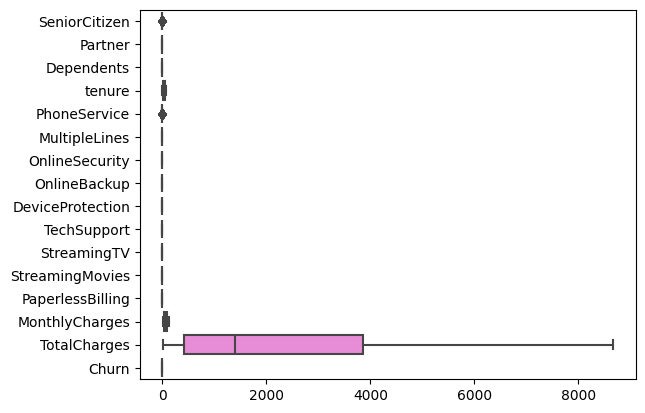

In [34]:
# Boxplot Visualization

sns.boxplot(data=voda_df, orient='h')

##### **UNIVARIATE ANALYSIS**

<function matplotlib.pyplot.show(close=None, block=None)>

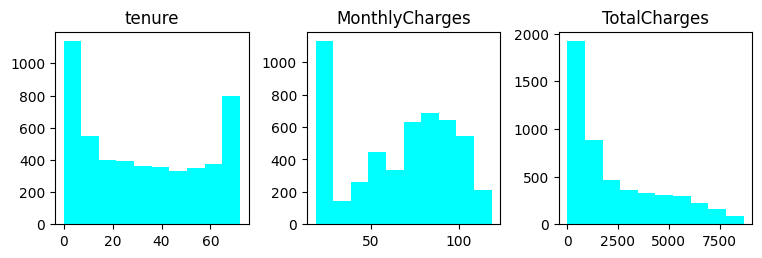

In [35]:
voda_df.hist(figsize=(9,9),grid=False,layout=(3,3),color="Cyan")
plt.show

## <b>  Count Plots for Categorical Columns

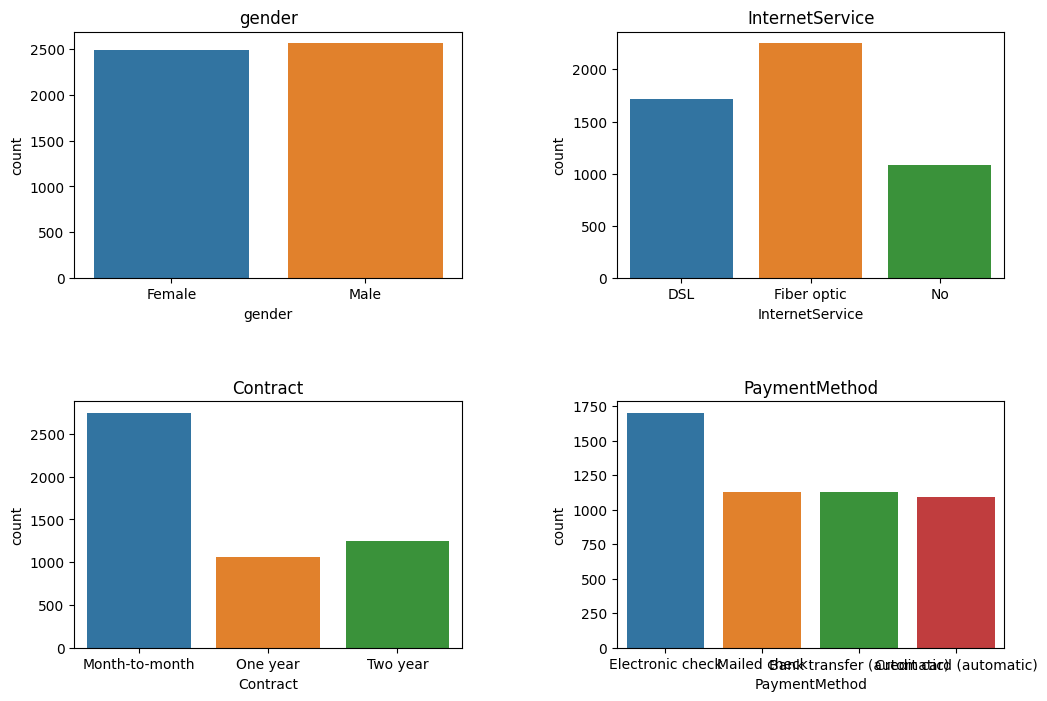

In [36]:
# List of columns containing categorical values
categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

# Set up subplots for better visibility with adjusted size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.4)  # Adjust vertical and horizontal spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    # Create a count plot using Seaborn
    sns.countplot(data=voda_df, x=column, ax=axes[i])

    # Add a title to the count plot with the name of the column
    axes[i].set_title(column)

# Hide empty subplots
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

# Show the count plots
plt.show()

#### **Count Plots for Categorical Columns**

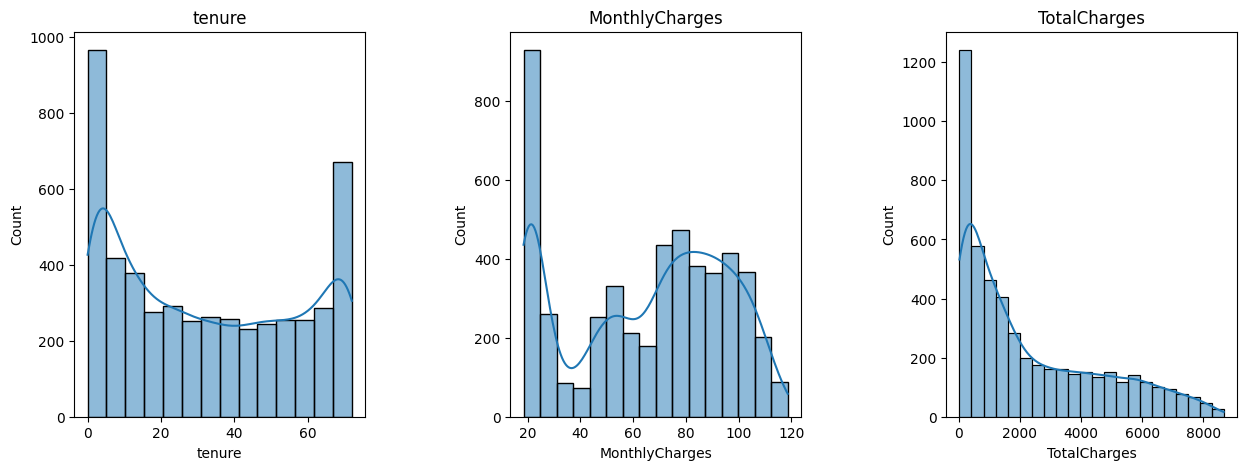

In [37]:

numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots for better visibility
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_columns), figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing

# Loop through each numerical column
for i, column in enumerate(numerical_columns):
    # Create a histogram using Seaborn
    sns.histplot(data=voda_df, x=column, kde=True, ax=axes[i])

    # Add a title to the histogram with the name of the column
    axes[i].set_title(column)

# Show the subplots for numerical histograms
plt.show()


## <b> Bivariate analysis

                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.240645      0.826264
MonthlyCharges  0.240645        1.000000      0.647007
TotalCharges    0.826264        0.647007      1.000000


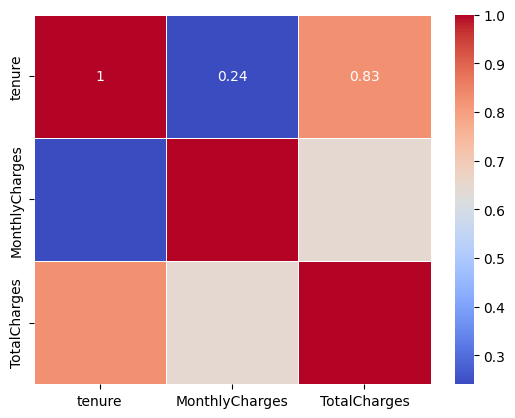

In [38]:
numeric_columns = voda_df.select_dtypes(include=['number']).columns
correlation_matrix = voda_df[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

## **multivariate analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

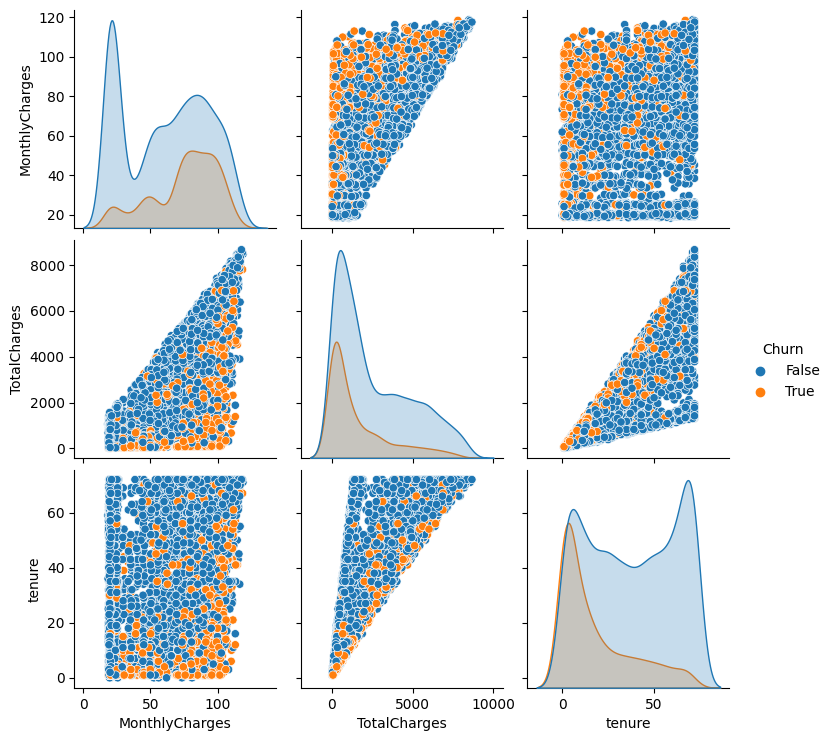

In [39]:
data=voda_df[['Churn', 'MonthlyCharges','TotalCharges','tenure']]


sns.pairplot(data, hue='Churn')
plt.show

### <b>Answering analytical questions

1.Which payment method is the most popular?

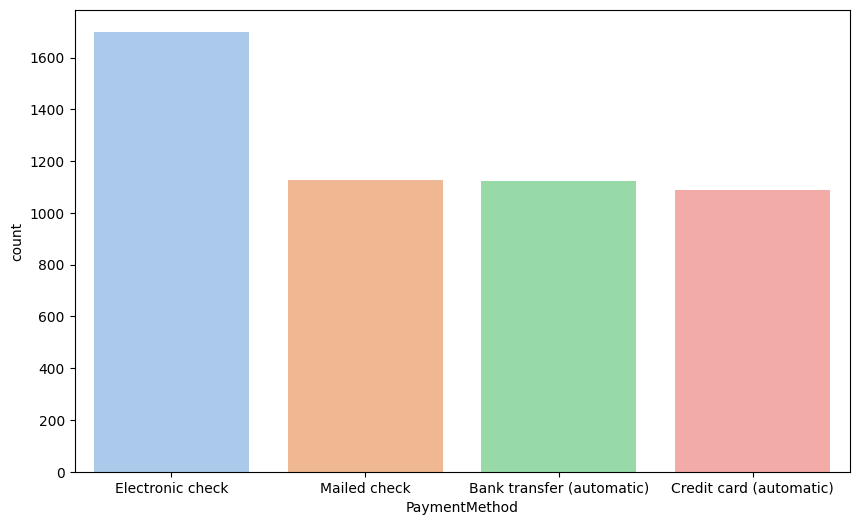

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=voda_df, x='PaymentMethod', palette="pastel")
plt.show() 

2. Which internet service was purchased the most?

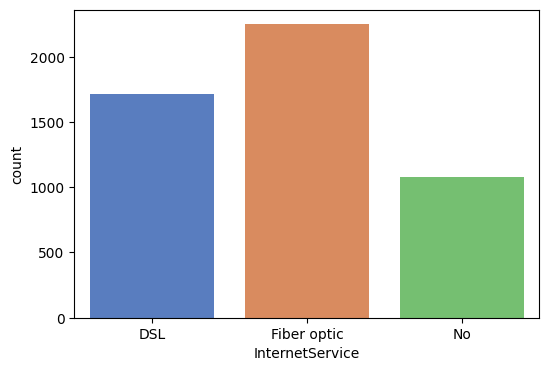

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='InternetService', palette="muted")
plt.show()

3. Which gender recorded the highest churn

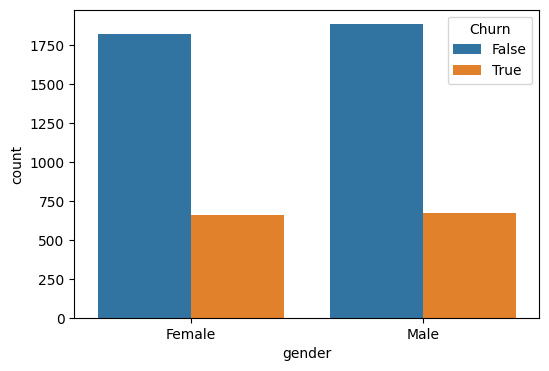

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='gender', hue="Churn")
plt.show()

4. Which one of the contract types did the highest churn

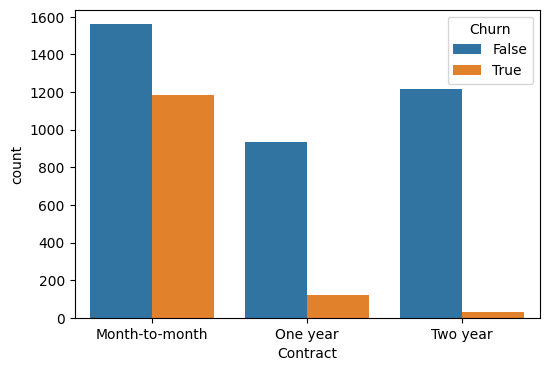

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='Contract', hue="Churn")
plt.show()

5. Which age group did the highest churn

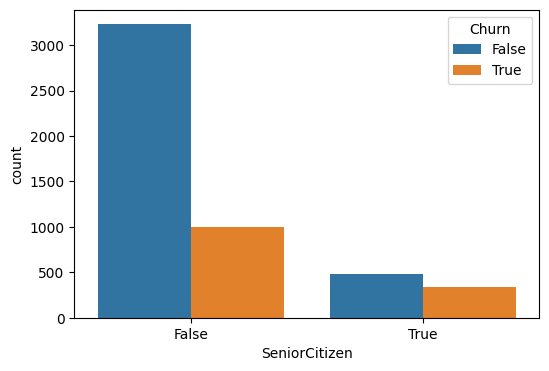

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=voda_df, x='SeniorCitizen', hue="Churn")
plt.show()

## <B>Insights<B> <I>

`It can be seen from the graph that,non senior citizens(0) has the highest churn compared to senior citizens. however,over 80 % of senior citizens churned compared to about 40% of the non senior citizens that churned. we therefore conclude that senior citizens churned the most`

 ## <B> HYPOTHESIS
 **Null Hypothesis**: Customers with high monthly charges do not have the tendency to churn

 **Alternate Hypothesis**:Customers with high monthly Charges have the tendency to churn

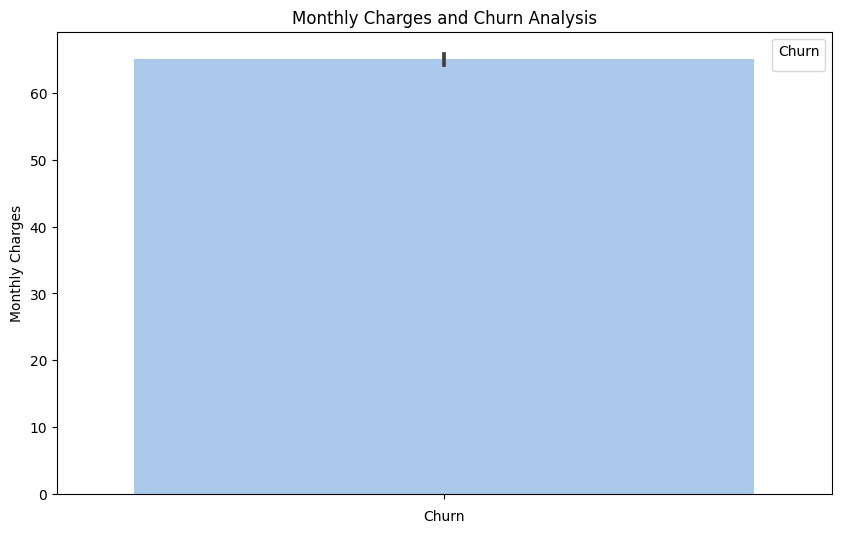

In [45]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=voda_df, y='MonthlyCharges', hue="Churn", palette="pastel")

# Add labels and title
plt.title('Monthly Charges and Churn Analysis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title='Churn')

plt.show()


##  `Data Preparation`

Data Preparation also known as **data preprocessing**, is a crucial phase in the machine learning pipeline. It involves cleaning, transforming, and structuring raw data into a format that is suitable for analysis and model building. Data preparation aims to improve the quality of the data and enhance the performance of machine learning models. This phase lays the foundation for accurate and meaningful analysis and predictions.

- **Train-test split**: Divide the data into training and testing sets for model evaluation.
- **Clean and preprocess data: Handle missing values, outliers, and inconsistencies**.
- **Data Transformation**:
    - Standardization: Scale numerical features to have a mean of 0 and a standard deviation of 1.
    - Normalization: Scale features to a specific range, typically 0 to 1.
    - Log Transformation: Apply log functions to reduce skewness in data distributions.
    - Encoding Categorical Variables: Convert categorical variables into numerical format (e.g., one-hot encoding, label encoding).
- **Feature engineering**
    - Create New Features: Generate new variables based on domain knowledge, interactions, or transformations and choose features that have the most predictive power and discard irrelevant ones.
- **Address class imbalance (if applicable)**: Over-sample, under-sample, or use class weights to balance classes.

##  **data splitting**

In [46]:


# Define features (X) and target variable (y)
X = voda_df.drop('Churn', axis=1)  #'Churn' is the target variable
y = voda_df['Churn']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4034, 20)
Shape of X_test: (1009, 20)
Shape of y_train: (4034,)
Shape of y_test: (1009,)


### List of things done below

- `Impute missing values with mean`
- `Standardize numeric features`
- `Power transform for skewness`
- `Impute missing values with most frequent`
- `One-hot encode categorical features`

In [47]:
categorical_features = X.select_dtypes(include=['bool', 'object']).columns

categorical_features

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [48]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

numeric_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### <b> PIPELINES

##### `These pipelines are designed to handle both numeric and categorical data in a structured and consistent way, preparing the data for machine learning models.`

`ENCODING TARGET VARIABLE`

In [49]:

# Numeric pipeline 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),            
    ('scaler', StandardScaler()),                            
    ('power_transformer', PowerTransformer(method="yeo-johnson")) 
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),   
    ('onehot', OneHotEncoder(handle_unknown='ignore'))       
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


`ENCODING TARGET VARIABLE`

In [50]:

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

#using the same label_encoder instance we transfromed the test labels )
y_test_encoded = label_encoder.transform(y_test)


In [51]:
# Sample data generation (replace this with your data loading)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical and numerical features
categorical_features = []  # Replace with your categorical feature columns
numerical_features = list(range(X.shape[1]))  # Assuming all features are numerical

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

## `MODELING`

In [52]:
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]
 
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
    pipeline.fit(X_train,y_train_encoded)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        89
           1       0.87      0.84      0.85       111

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.77      0.89      0.82        89
           1       0.90      0.78      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.84      0.83      0.83       200



Report for rf_classifier
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Report for nb_classifier
              precision    recall  f1-score   support

           0       0.75      0.87      0.80        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.81      0.82      0.81       200
weighted avg       0.82      0.81      0.81       200

Report for gb_classifier
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        89
           1       0.95      0.86      0.91       111

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200

# <B>EVALUATION

`Handling imbalanced dataset` 
`After running this code, X_train_resampled and y_train_resampled will contain the training data with a balanced class distribution.`

In [53]:
# using over sampling method on the dataset to balance your dataset

sampler = RandomOverSampler(random_state=42)
X_train_resampled,y_train_resampled = sampler.fit_resample(X_train,y_train_encoded)


In [54]:
# List of models to evaluate

models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]
 
 # Loop through each model

for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('classifier',classifier),
    ])
 
  # Fit the pipeline on the resampled training dat
    
    pipeline.fit(X_train_resampled,y_train_resampled)
    
 # Make predictions on the test set
        
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        89
           1       0.88      0.84      0.86       111

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        89
           1       0.90      0.79      0.84       111

    accuracy                           0.83       200
   macro avg       0.84      0.84      0.83       200
weighted avg       0.84      0.83      0.84       200



Report for rf_classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        89
           1       0.92      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

Report for nb_classifier
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        89
           1       0.88      0.77      0.82       111

    accuracy                           0.81       200
   macro avg       0.82      0.82      0.81       200
weighted avg       0.82      0.81      0.82       200

Report for gb_classifier
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        89
           1       0.95      0.84      0.89       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris

In [56]:
# Initialize SelectKBest feature selection
selection = SelectKBest(k=2)
X_new = selection.fit_transform(X, y)

# After fitting the selection object, you can use get_support
selected_indices = selection.get_support(indices=True)

In [57]:
# retraining the models with our resampled data
models = [
    ('tree_classifier',DecisionTreeClassifier(random_state=42)),
    ('svc_classifier',SVC(random_state=42)),
    ('rf_classifier',RandomForestClassifier(random_state=42)),
    ('nb_classifier',GaussianNB()),
    ('gb_classifier',GradientBoostingClassifier()),
 
]

for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('feature_selection',selection),
        ('classifier',classifier),
        
    ])
 
    pipeline.fit(X_train_resampled,y_train_resampled)
    
    y_pred = pipeline.predict(X_test)
 
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded,y_pred))
    print ('=' * 50)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        89
           1       0.93      0.85      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

Report for svc_classifier
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        89
           1       0.89      0.82      0.85       111

    accuracy                           0.84       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



Report for rf_classifier
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        89
           1       0.93      0.86      0.90       111

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

Report for nb_classifier
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        89
           1       0.89      0.78      0.83       111

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200

Report for gb_classifier
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        89
           1       0.87      0.86      0.86       111

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200

## **ROC Curve Plotting**
`We are using the trained decision tree classifier to make predictions on a test set (X_test). The predicted values (rf_pred) are then compared with the true labels (y_test_encoded) to construct a confusion matrix.`

In [58]:
# decision tree pipeline

decision_tree_balanced= Pipeline([
    ('preprocessor',preprocessor ),
    ('feature_selection',selection),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

decision_tree_balanced.fit(X_train_resampled,y_train_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                   9])])),
                ('feature_selection', SelectKBest(k=2)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [59]:

# Evaluating Model Confusion Matrix:

rf_pred = decision_tree_balanced.predict(X_test)

print(confusion_matrix(y_test_encoded,rf_pred))

[[82  7]
 [17 94]]


In [60]:
# Evaluating ROC Curve and AUC:d

y_pred_prob = decision_tree_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)

print(f'AUC: {roc_auc:.2f}')

AUC: 0.88


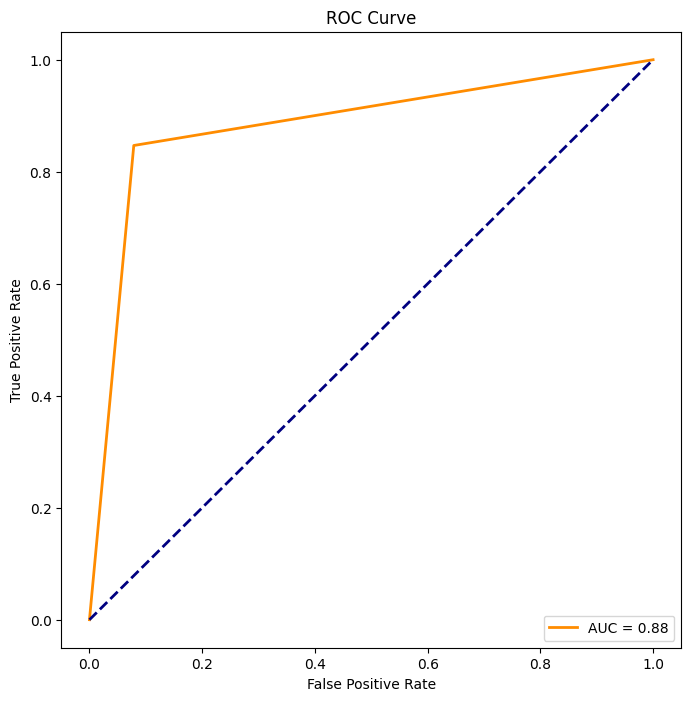

In [61]:
# Visulization

y_pred_prob = decision_tree_balanced.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob)

roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)

# Plotting ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


- From the curve we can see that gradient boosting classifier covered the most area with an auc of 0.88, it is the best performing model so far

In [62]:
# checking the fpr,tpr and threshold 
roc_auc

0.8840975807267942

In [63]:
# Creating a DataFrame with ROC curve information
df = pd.DataFrame(zip(fpr, tpr, thresholds), columns=['False Positive', 'True Positive', 'Threshold'])


df

,False Positive,True Positive,Threshold
0,0.000000,0.000000,inf
1,0.078652,0.846847,1.0
2,1.000000,1.000000,0.0


### <b> HYPERPARAMETER TUNING

In [64]:
from sklearn.model_selection import GridSearchCV
    
    
# setting the parameters
params_grid = {
    'feature_selection__k': [5, 10, 15],  
    'classifier__n_estimators': [5, 10, 15],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

searcher = GridSearchCV(
    pipeline, 
    param_grid=params_grid, 
    cv=5, scoring='f1'
    )
# fitting the searcher with train data
searcher.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         []),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8,
                                                                          9])])),
                                       ('feature_selection', SelectKBest(k=2)),
                                       ('classifier',
                                        GradientBoostingClassifier())]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [5, 10, 15],
                         'feature_selection__k': [5, 10, 15]},
             scoring='f1')

In [65]:
from sklearn.model_selection import GridSearchCV

# X_train_resampled and y_train_resampled defined

grid_searches = {}

for model in models:
    model_name = model.__class__.__name__
    
    # Define the parameter grid for the specific model
    param_grid = {}
    
    if model_name == 'DecisionTreeClassifier':
        param_grid = {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
        }
    elif model_name == 'RandomForestClassifier':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
        }
    
    # Create a pipeline for the model
    pipeline = Pipeline([
        ('feature_selection', selection),
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform GridSearchCV for the specific model
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Save the grid search result
    grid_searches[model_name] = grid_search


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 357, in _fit
    self._validate_steps()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 254, in _validate_steps
    raise TypeError(
TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '('tree_classifier', DecisionTreeClassifier(random_state=42))' (type <class 'tuple'>) doesn't


In [ ]:
# setting the parameters
params_grid = {
    'feature_selection__k': [5, 10, 15],  
    'classifier__n_estimators': [5, 10, 15],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
}

searcher = GridSearchCV(
    gradient_pipeline, 
    param_grid=params_grid, 
    cv=5, scoring='f1'
    )
# fitting the searcher with train data
searcher.fit(X_train, y_train_encoded)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define your selection and preprocessor (replace these placeholders with your actual methods)
selection = ...  # Your feature selection method
preprocessor = ...  # Your data preprocessing method

# X_train_resampled and y_train_resampled defined

grid_searches = {}

models = [DecisionTreeClassifier(), RandomForestClassifier()]

for model in models:
    model_name = model.__class__.__name__
    
    # Define the parameter grid for the specific model
    param_grid = {}
    
    if model_name == 'DecisionTreeClassifier':
        param_grid = {
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
        }
    elif model_name == 'RandomForestClassifier':
        param_grid = {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20, 30],
            'classifier__min_samples_split': [2, 5, 10],
            'classifier__min_samples_leaf': [1, 2, 4],
            'classifier__max_features': ['auto', 'sqrt', 'log2']
        }
    
    # Create a pipeline for the model
    pipeline = Pipeline([
        ('feature_selection', selection),
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform GridSearchCV for the specific model
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Save the grid search result
    grid_searches[model_name] = grid_search

ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 357, in _fit
    self._validate_steps()
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 241, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'Ellipsis' (type <class 'ellipsis'>) doesn't
